<a href="https://colab.research.google.com/github/Sfirouzian/Datasets/blob/main/LAPD_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.simplilearn.com/top-python-libraries-for-data-science-article

This website has information on useful Python libraries for data science.


#w1 from report type to disposition description into a new file
#w2 use for loop to delete an entire row if there is an "N" null data
#w3 look at categories for disposition description
#w4 for each category draw a sample size (30-50) 
#w5 compare mean age for each category (one way anova)
#w6 chi square test of independency for ethnicity (descent code) and disposition
#w7 write proposal/report and present data

In [ ]:
  !pip install --upgrade tensorflow_hub

  import tensorflow_hub as hub

  model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
  embeddings = model(["The rain in Spain.", "falls",
                      "mainly", "In the plain!"])

  print(embeddings.shape)  #(4,128)

Important functions from [tensorflow](https://www.tensorflow.org/):

- time series analysis functions

1. 
hub.create_module_spec(
    module_fn, tags_and_args=None, drop_collections=None
)
//Creates a ModuleSpec from a function that builds the module's graph.

Article about data visualization:

https://www.simplilearn.com/data-visualization-article


In [ ]:
pip install numpy


[NumPy](https:/numpy.org/): Very useful
- Array-oriented computing
- Extensively used in data analysis 
- Creates powerful N-dimensional array

In [ ]:
pip install scipy

[SciPy](https:/scipy.org/):Extension of NumPy
- useful for data manipulation and visualization. 
- built-in functions for solving differential equations
- Optimization algorithms
- Linear algebra


In [ ]:
import pandas

Pandas is useful for:
- General data wrangling and data cleaning
- Time-series-specific functionality, such as date range generation, moving window, linear regression and date shifting.
- Plotting
- Resampling
- Data Offsets

All of these [functions](https://pandas.pydata.org/docs/reference/general_functions.html#data-manipulations) for data manipulations are useful. Also these [functions](https://pandas.pydata.org/docs/reference/frame.html) for data frames are useful too.

In [ ]:
pip install matplotlib

[Matplotlib](https://matplotlib.org) is one of the most useful libraries:

- Visualize 95 percent confidence intervals
- Outlier detection using a scatter plot etc.
- Visualize the distribution of data to gain instant insights


***Next Step:***

How to upload a dataset from our PC/MAC into Google Colab/ Python? 

How to upload a dataset from a GitHub URL address into Google Colab/ Python

In [ ]:
##Example Let's upload LAPD Arrest Data: https://data.lacity.org/Public-Safety/Arrest-Data-from-2010-to-2019/yru6-6re4 


Let's find Python commands we can use for data cleaning

How do we deal with empty or missing or NA data cells

In [ ]:
##We can LAPD arrest data as an example 
##Lets clean LAPD data based on Arrestee Ethnicity (Descent Code) and the type of crime they commit (Charge Group Description)

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import scipy.stats
from scipy.stats import chi2

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Get the file

downloaded = drive.CreateFile({'id':'1Ms66SDqwAnUtTKP5Duyzl46Qwx3Z1xw8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Arrest_Data_from_2020_to_Present.csv')

In [ ]:
import pandas as pd

#file = "1Ms66SDqwAnUtTKP5Duyzl46Qwx3Z1xw8"
#file = "/content/LAPD_Arrest_Data_from_2020_to_Present.csv"
file = "/content/Arrest_Data_from_2020_to_Present.csv"


df = pd.read_csv(file)
df.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,211517634,RFC,11/16/2021 12:00:00 AM,830.0,15,N Hollywood,1535,57,M,W,...,MISDEMEANOR COMPLAINT FILED,LANKERSHIM,CALIFA,34.1775,-118.3822,POINT (-118.3822 34.1775),NaN,NaN,NaN,NaN
1,211218835,RFC,09/01/2021 12:00:00 AM,1230.0,12,77th Street,1207,22,M,H,...,MISDEMEANOR COMPLAINT FILED,4700 S VERMONT AV,NaN,33.9996,-118.2915,POINT (-118.2915 33.9996),NaN,NaN,NaN,NaN
2,221507152,RFC,03/17/2022 12:00:00 AM,850.0,15,N Hollywood,1511,35,M,H,...,MISDEMEANOR COMPLAINT FILED,FULTON,VARNA,34.2037,-118.4210,POINT (-118.421 34.2037),NaN,NaN,NaN,NaN
3,211611663,RFC,09/20/2021 12:00:00 AM,1735.0,16,Foothill,1675,24,M,H,...,MISDEMEANOR COMPLAINT FILED,8800 SUNLAND BL,NaN,0.0000,0.0000,POINT (0 0),NaN,NaN,NaN,NaN
4,211911576,RFC,07/27/2021 12:00:00 AM,850.0,19,Mission,1961,51,F,H,...,MISDEMEANOR COMPLAINT FILED,9400 N SEPULVEDA BL,NaN,34.2388,-118.4677,POINT (-118.4677 34.2388),NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import csv

#lapd_df = pd.read_csv('Arrest_Data_from_2020_to_Present.csv')
lapd_df = pd.read_csv('Arrest_Data_from_2020_to_Present.csv')
lapd_df_replicate = pd.DataFrame(lapd_df, columns=['Report Type','Arrest Date','Time','Area ID','Area Name','Reporting District','Age','Sex Code','Descent Code','Arrest Type Code','Disposition Description'])

#cleaning data for NaN values and saving as .csv: https://datatofish.com/dropna/
lapd_df_replicate = lapd_df_replicate.dropna()
lapd_df_replicate.reset_index(drop=True)
#print(lapd_df_replicate.describe)
lapd_df_replicate.to_csv(r'Clean_Data.csv')

#create 2-way table between discent code & disposition description
#https://stackoverflow.com/questions/17201524/how-can-i-create-a-2-way-table-in-python
data_2020_Present = pd.read_csv("Clean_Data.csv")
grouped_df = data_2020_Present.groupby(['Descent Code', 'Arrest Type Code'])

# Count the number of occurrences of each particular value in each particular column
counts = grouped_df['Descent Code'].size()
#print(counts)

#Different data description characteristics
#print(data_2020_Present['Disposition Description'].describe())
#print(data_2020_Present['Descent Code'].describe())
#print(data_2020_Present['Disposition Description'].value_counts())
print(data_2020_Present['Arrest Type Code'].value_counts())
#print(data_2020_Present['Descent Code'].value_counts())
#data_2020_Present['Disposition Description'].value_counts()

F    91084
M    78068
I    13073
O     1865
D      449
Name: Arrest Type Code, dtype: int64


In [ ]:
#Chi-Squaree Test

two_way_table = pd.crosstab(data_2020_Present['Arrest Type Code'],data_2020_Present['Descent Code'], margins = True)
#final graphic discent codes 2020:
#Hispanic - 94685 
#Black - 50655 
#White - 28833 
#Combine O, X into Other - 9415
#Combine A, K, F, C, J, L, Z, D into Asian - 895
#Combine P, G, S, U, I into Native American or Pacific Islander - 57

#2020 data discent codes:
#H    94685 hispanic - keep
#B    50655 black - keep
#W    28833 white - keep
#O     9389 Other - combined
#A      609 - Other asian - combined
#K       92 - Korean - combined
#F       91 - Filipino - combined
#C       86 - Chinese - combined
#G       28 - Guamanian - combined
#X       26 - Unknown - combined
#P       14 - Pacific Islander - combined
#J       13 - Japanese - combined
#I        8 - Native American (Indian) - combined
#S        5 - Samoan - combined
#D        2 - Cambodian - combined
#U        2 - Hawaiian - combined
#L        1 - Laotian - combined
#Z        1 - Asian Indian - combined

#Combining columns
two_way_table['Other'] = two_way_table['O'] + two_way_table['X']
two_way_table['Asian'] = two_way_table['A'] + two_way_table['K'] + two_way_table['F'] + two_way_table['C'] + two_way_table['J'] + two_way_table['L'] + two_way_table['Z'] + two_way_table['D'] 
two_way_table['NAPI'] = two_way_table['P'] + two_way_table['G'] + two_way_table['S'] + two_way_table['U'] + two_way_table['I']

#Dropping and renaming columns
two_way_table.drop(['A', 'K', 'F', 'C', 'J', 'L', 'Z', 'D','P', 'G', 'S', 'U', 'I','O','X'], axis='columns', inplace = True)
two_way_table.rename(columns = {'B':'Black','H':'Hispanic','W':'White'}, inplace = True)
#two_way_table.rename(rows = {'D':'Dependent','F':'Felony','I':'Infraction','O':'Other'}, inplace = True)
#two_way_table.rename({2:"Dependency Case"}, axis = 'index')#,'F':'Felony','I':'Infraction','O':'Other'}, inplace = True)
#two_way_table.rename(index = {0:'Dependency Cases',1:'Felony',2:'Infraction',3:'Misdemeanor',4:'Other',5:'All'},inplace = True)
two_way_table.index = ['Dependency Cases','Felony','Misdemeanor','Infraction','Other','All']
#left off here: renaming the rows to the cases

two_way_table = two_way_table[['Hispanic','Black','White','Other','Asian','NAPI','All']]

two_way_table
#two_way_table_array = two_way_table.to_numpy()#convert to proportions (horizontal), get rid of all categories, put into 3d graph
#two_way_table_array
#two_way_table_array[1][6]
#two_way_table_array[1,2]
#print(data_2020_Present['Arrest Type Code'].value_counts())


Descent Code,Hispanic,Black,White,Other,Asian,NAPI,All
Dependency Cases,267,129,24,27,2,0,449
Felony,45848,28914,11829,4322,136,35,91084
Misdemeanor,7779,1768,2888,504,133,1,13073
Infraction,39663,19396,13863,4501,624,21,78068
Other,1128,448,228,61,0,0,1865
All,94685,50655,28832,9415,895,57,184539


In [ ]:
#values before calculating percentages
#result=[[0, '0', '0', '0', '0','0'],
#        ['0', '0', '0', '0', '0','0'],
#        ['0', '0', '0', '0', '0','0'],
#        ['0', '0', '0','0', '0','0'],
#        ['0', '0', '0', '0', '0','0']]

for i in range(0, 4):
  for j in range(0,5):
    result[i][j]=((two_way_table_array[i][j])/(two_way_table_array[i][6]))*100

result

array([[5.94654788e+01, 2.87305122e+01, 5.34521158e+00, 6.01336303e+00,
        4.45434298e-01, 2.80000000e-02],
       [5.03359536e+01, 3.17443239e+01, 1.29869132e+01, 4.74507048e+00,
        1.49312722e-01, 3.80000000e-02],
       [5.95043219e+01, 1.35240572e+01, 2.20913333e+01, 3.85527423e+00,
        1.01736403e+00, 0.00000000e+00],
       [5.08057078e+01, 2.48450069e+01, 1.77575959e+01, 5.76548650e+00,
        7.99303172e-01, 7.60000000e-03],
       [6.04800000e+01, 2.40200000e+01, 1.22300000e+01, 3.27000000e+00,
        0.00000000e+00, 0.00000000e+00]])

<ipython-input-51-f3e3cf9f5ec7>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.array(result, dtype=np.float)
<ipython-input-51-f3e3cf9f5ec7>:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticks(xpos + dx/2.)
<ipython-input-51-f3e3cf9f5ec7>:40: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticklabels(xlabels)
<ipython-input-51-f3e3cf9f5ec7>:42: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be r

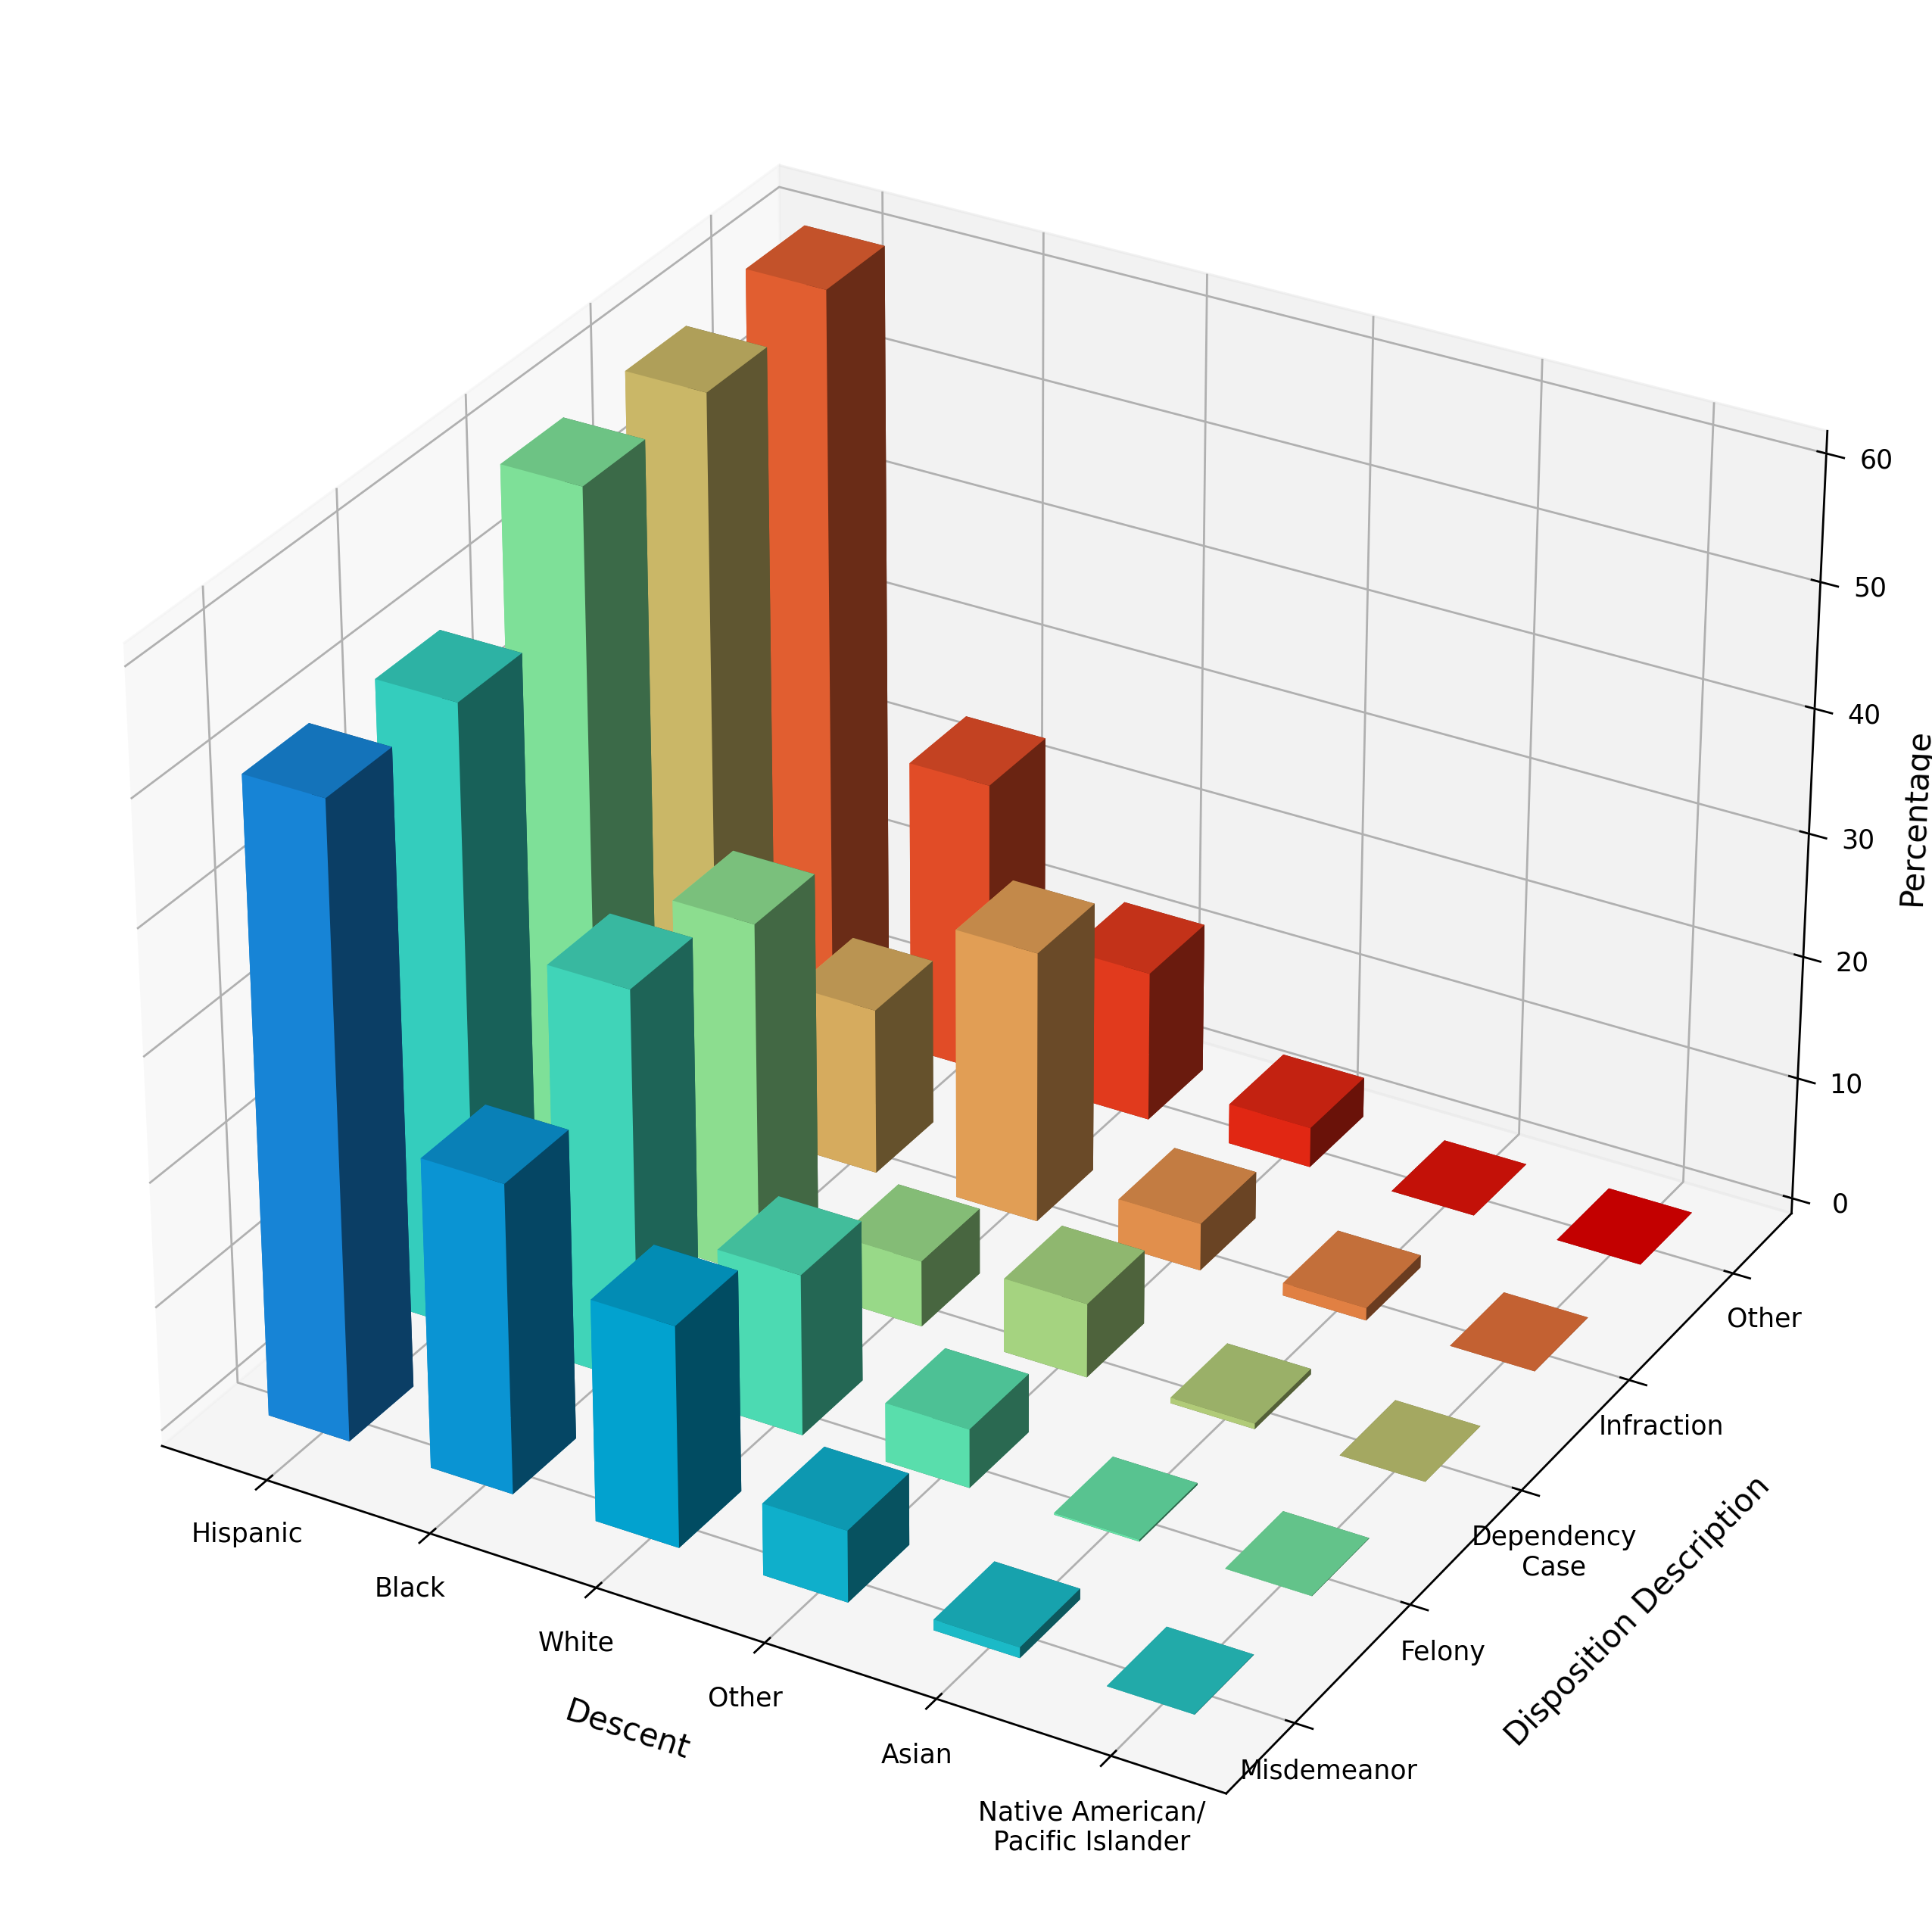

In [ ]:
#3D Bar Chart

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#result = two_way_table_array

#result=[['50.805', '24.845', '17.757', '5.765', '.857','.028'],
#        ['50.34', '31.74', '12.99', '4.75', '.15','.038'],
#        ['59.47', '28.73', '5.35', '6.01', '.45','0'],
#        ['59.5', '13.52', '22.09','3.86', '1.02','.0076'],
#        ['60.48', '24.02', '12.23', '3.27', '0','0']]


result = np.array(result, dtype=np.float)
colors = ['r','b','g','y','b','p']
fig=plt.figure(figsize=(13, 13), dpi=250)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Descent', labelpad=10)
ax1.set_ylabel('Disposition Description', labelpad=20)
ax1.set_zlabel('Percentage')
xlabels = np.array(['Hispanic', 'Black', 'White','Other', 'Asian', 'Native American/\nPacific Islander'])#hispanic, black, white, other, asian, native american/pacific islander
xpos = np.arange(xlabels.shape[0])
#ylabels = np.array(['Misdemeanor','Felony','District/City\nAttorney\nReject','Technical Arrest','Other']) - originally had but changed
ylabels = np.array(['Misdemeanor','Felony','Dependency\nCase','Infraction','Other'])

ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

#ax1.zaxis._axinfo['label']['space_factor'] = 6.0

ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)
ax1.zaxis.label.set_fontsize(12)

#plt.subplots_adjust(left=0.1)

values = np.linspace(0.2, 1, xposM.ravel().shape[0])#colors setting the shade for each
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)#setting position and color of each bar
plt.show()

In [ ]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(two_way_table)#two_way_table is the data, not the percentages

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
#print("expected frequencies:\n",expected)

chi2 statistic:     3596.1
p-value:            0
degrees of freedom: 30


Below is data representations for 2010 to 2019:

In [ ]:
#Get the file 2010 to 2019

#ile = '/content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv'
#file.head()
#1CKsLiNU1Ibdw0GLnTtg9Bfft-lOtSTOk/view?usp=sharing
downloaded = drive.CreateFile({'id':'1CKsLiNU1Ibdw0GLnTtg9Bfft-lOtSTOk'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Arrest_Data_from_2010_to_2019.csv') 

AttributeError: ignored

In [ ]:
import pandas as pd

file = '/content/drive/MyDrive/Arrest_Data_from_2010_to_2019.csv' # replace the id with id of file you want to access
lapd_2010_2019_df = pd.read_csv(file)
lapd_2010_2019_df.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Booking Date,Booking Time,Booking Location,Booking Location Code,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,2377805,BOOKING,06/22/2010,1845.0,16,Foothill,1664,46,F,W,...,06/22/2010 12:00:00 AM,2108.0,VALLEY - JAIL DIV,4279.0,19335.0,155.0,1371.0,NaN,3.0,21.0
1,121920046,RFC,09/28/2012,930.0,19,Mission,1998,60,M,H,...,NaN,NaN,NaN,NaN,19730.0,151.0,462.0,NaN,3.0,59.0
2,101820989,RFC,10/20/2010,700.0,18,Southeast,1829,14,M,H,...,NaN,NaN,NaN,NaN,24030.0,376.0,589.0,13.0,11.0,92.0
3,90712341,RFC,03/10/2011,940.0,7,Wilshire,776,45,M,B,...,NaN,NaN,NaN,NaN,23080.0,651.0,1106.0,NaN,12.0,69.0
4,121909585,RFC,04/01/2012,1715.0,19,Mission,1993,37,M,H,...,NaN,NaN,NaN,NaN,19730.0,141.0,424.0,NaN,3.0,59.0


In [ ]:
import pandas as pd
import csv

#lapd_df = pd.read_csv('Arrest_Data_from_2020_to_Present.csv')
#lapd_2010_2019_df = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
lapd_2010_2019_df_replicate = pd.DataFrame(lapd_2010_2019_df, columns=['Report Type','Arrest Date','Time','Area ID','Area Name','Reporting District','Age','Sex Code','Descent Code','Arrest Type Code','Disposition Description'])
lapd_2010_2019_df_replicate

,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Arrest Type Code,Disposition Description
0,BOOKING,06/22/2010,1845.0,16,Foothill,1664,46,F,W,F,MISDEMEANOR COMPLAINT FILED
1,RFC,09/28/2012,930.0,19,Mission,1998,60,M,H,M,MISDEMEANOR COMPLAINT FILED
2,RFC,10/20/2010,700.0,18,Southeast,1829,14,M,H,M,NaN
3,RFC,03/10/2011,940.0,7,Wilshire,776,45,M,B,M,MISDEMEANOR COMPLAINT FILED
4,RFC,04/01/2012,1715.0,19,Mission,1993,37,M,H,M,MISDEMEANOR COMPLAINT FILED
...,...,...,...,...,...,...,...,...,...,...,...
1321057,BOOKING,01/01/2018,1950.0,16,Foothill,1676,36,M,H,F,FELONY COMPLAINT FILED
1321058,BOOKING,11/02/2018,900.0,3,Southwest,391,39,M,H,F,CITY ATTORNEY REJECT
1321059,BOOKING,02/10/2019,1015.0,3,Southwest,303,23,F,B,F,CITY ATTORNEY REJECT
1321060,BOOKING,02/10/2019,1015.0,3,Southwest,303,25,F,B,F,CITY ATTORNEY REJECT


In [ ]:

#print(lapd_df_section_to_replicate)
#lapd_df_section_to_replicate[lapd_df_section_to_replicate.isnull().any(axis=1)]
#lapd_df_section_to_replicate = lapd_df_section_to_replicate.apply (pd.to_numeric, errors='coerce')

#cleaning data for NaN values and saving as .csv
#https://datatofish.com/dropna/
#print(lapd_df.isna)
lapd_2010_2019_df_replic = lapd_2010_2019_df_replicate.dropna()
lapd_2010_2019_df_replicate =lapd_2010_2019_df_replic[lapd_2010_2019_df_replic['Arrest Type Code'] != '1']
#lapd_2010_2019_df_replicate.drop('Arrest Type Code' != 1)
#lapd_2010_2019_df_replicate = lapd_2010_2019_df_replicate['Arrest Type Code' != 1]
#lapd_2010_2019_df_replicate.drop(['A', 'K', 'F', 'C', 'J', 'L', 'Z', 'D','P', 'G', 'S', 'U', 'I','O','X','V'], axis='columns', inplace = True)
#lapd_2010_2019_df_replicate = lapd_2010_2019_df_replicate[:7]

lapd_2010_2019_df_replicate.reset_index(drop=True)

#lapd_df_replicate.DataFrame.describe

lapd_2010_2019_df_replicate.to_csv(r'Clean_Data.csv')

#create 2-way table between discent code & disposition description
#https://stackoverflow.com/questions/17201524/how-can-i-create-a-2-way-table-in-python
data_2010_2019 = pd.read_csv("Clean_Data.csv")
#data_2010_2019.drop(5,axis=1,inplace=True)


grouped_df = data_2010_2019.groupby(['Descent Code', 'Arrest Type Code'])
counts = grouped_df['Descent Code'].size()


#Different data description characteristics
#print(data_2010_2019['Disposition Description'].describe())
#print(data_2010_2019['Descent Code'].describe())
#print(data_2010_2019['Disposition Description'].value_counts())
print(data_2010_2019['Arrest Type Code'].value_counts())
#print(data_2010_2019['Descent Code'].value_counts())
#data_2010_2019['Disposition Description'].value_counts()

M    732970
F    395245
I     55863
O     26989
D      3866
Name: Arrest Type Code, dtype: int64


In [ ]:
#Chi-Squaree Test
two_way_table=pd.crosstab(data_2010_2019['Disposition Description'],data_2010_2019['Descent Code'])

##print('contingency_table :\n',two_way_table)

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(two_way_table)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
#print("expected frequencies:\n",expected)

chi2 statistic:     38390
p-value:            0
degrees of freedom: 432


In [ ]:
#Chi-square test for 3D Graph

two_way_table = pd.crosstab(data_2010_2019['Arrest Type Code'],data_2010_2019['Descent Code'], margins = True)

#Combining columns
two_way_table['Other'] = two_way_table['O'] + two_way_table['X']
two_way_table['Asian'] = two_way_table['V'] + two_way_table['A'] + two_way_table['K'] + two_way_table['F'] + two_way_table['C'] + two_way_table['J'] + two_way_table['L'] + two_way_table['Z'] + two_way_table['D'] 
two_way_table['NAPI'] = two_way_table['P'] + two_way_table['G'] + two_way_table['S'] + two_way_table['U'] + two_way_table['I']

#Dropping and renaming columns
two_way_table.drop(['A', 'K', 'F', 'C', 'J', 'L', 'Z', 'D','P', 'G', 'S', 'U', 'I','O','X','V'], axis='columns', inplace = True)
two_way_table.rename(columns = {'B':'Black','H':'Hispanic','W':'White'}, inplace = True)
#two_way_table.rename(rows = {'D':'Dependent','F':'Felony','I':'Infraction','O':'Other'}, inplace = True)
#two_way_table.rename({2:"Dependency Case"}, axis = 'index')#,'F':'Felony','I':'Infraction','O':'Other'}, inplace = True)
#two_way_table.rename(index = {0:'Dependency Cases',1:'Felony',2:'Infraction',3:'Misdemeanor',4:'Other',5:'All'},inplace = True)

#line below is not working for some reason
#two_way_table.index = ['Dependency Cases','Felony','Misdemeanor','Infraction','Other','All']

two_way_table = two_way_table[['Hispanic','Black','White','Other','Asian','NAPI','All']]

#two_way_table
two_way_table_array = two_way_table.to_numpy()#convert to proportions (horizontal), get rid of all categories, put into 3d graph
two_way_table_array

array([[   2511,     876,     313,     154,      10,       2,    3866],
       [ 176702,  133454,   64842,   19565,     563,     119,  395245],
       [  23845,   12498,   16829,    2067,     599,      25,   55863],
       [ 343461,  199253,  146771,   36288,    6883,     314,  732970],
       [  11947,   10482,    3877,     655,      21,       7,   26989],
       [ 558466,  356563,  232632,   58729,    8076,     467, 1214933]])

In [ ]:
#values before calculating percentages
result=[['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0']]

for i in range(0, 5):
  for j in range(0,5):
    result[i][j]=((two_way_table_array[i][j])/(two_way_table_array[i][6]))*100

result

[[64.95085359544748,
  22.659079151577856,
  8.09622348680807,
  3.983445421624418,
  0.2586652871184687,
  '0'],
 [44.706953914660524,
  33.764880011132334,
  16.405520626446886,
  4.950094245341497,
  0.14244329466533417,
  '0'],
 [42.68478241412026,
  22.37259008646152,
  30.125485562894937,
  3.7001235164599104,
  1.0722660795159589,
  '0'],
 [46.85880731817127,
  27.184332237335774,
  20.024148328035256,
  4.950816540922548,
  0.9390561687381475,
  '0'],
 [44.26618251880396,
  38.8380451294972,
  14.365111712179035,
  2.4269146689391974,
  0.07780947793545519,
  '0']]

<ipython-input-60-f3e3cf9f5ec7>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.array(result, dtype=np.float)
<ipython-input-60-f3e3cf9f5ec7>:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticks(xpos + dx/2.)
<ipython-input-60-f3e3cf9f5ec7>:40: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticklabels(xlabels)
<ipython-input-60-f3e3cf9f5ec7>:42: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be r

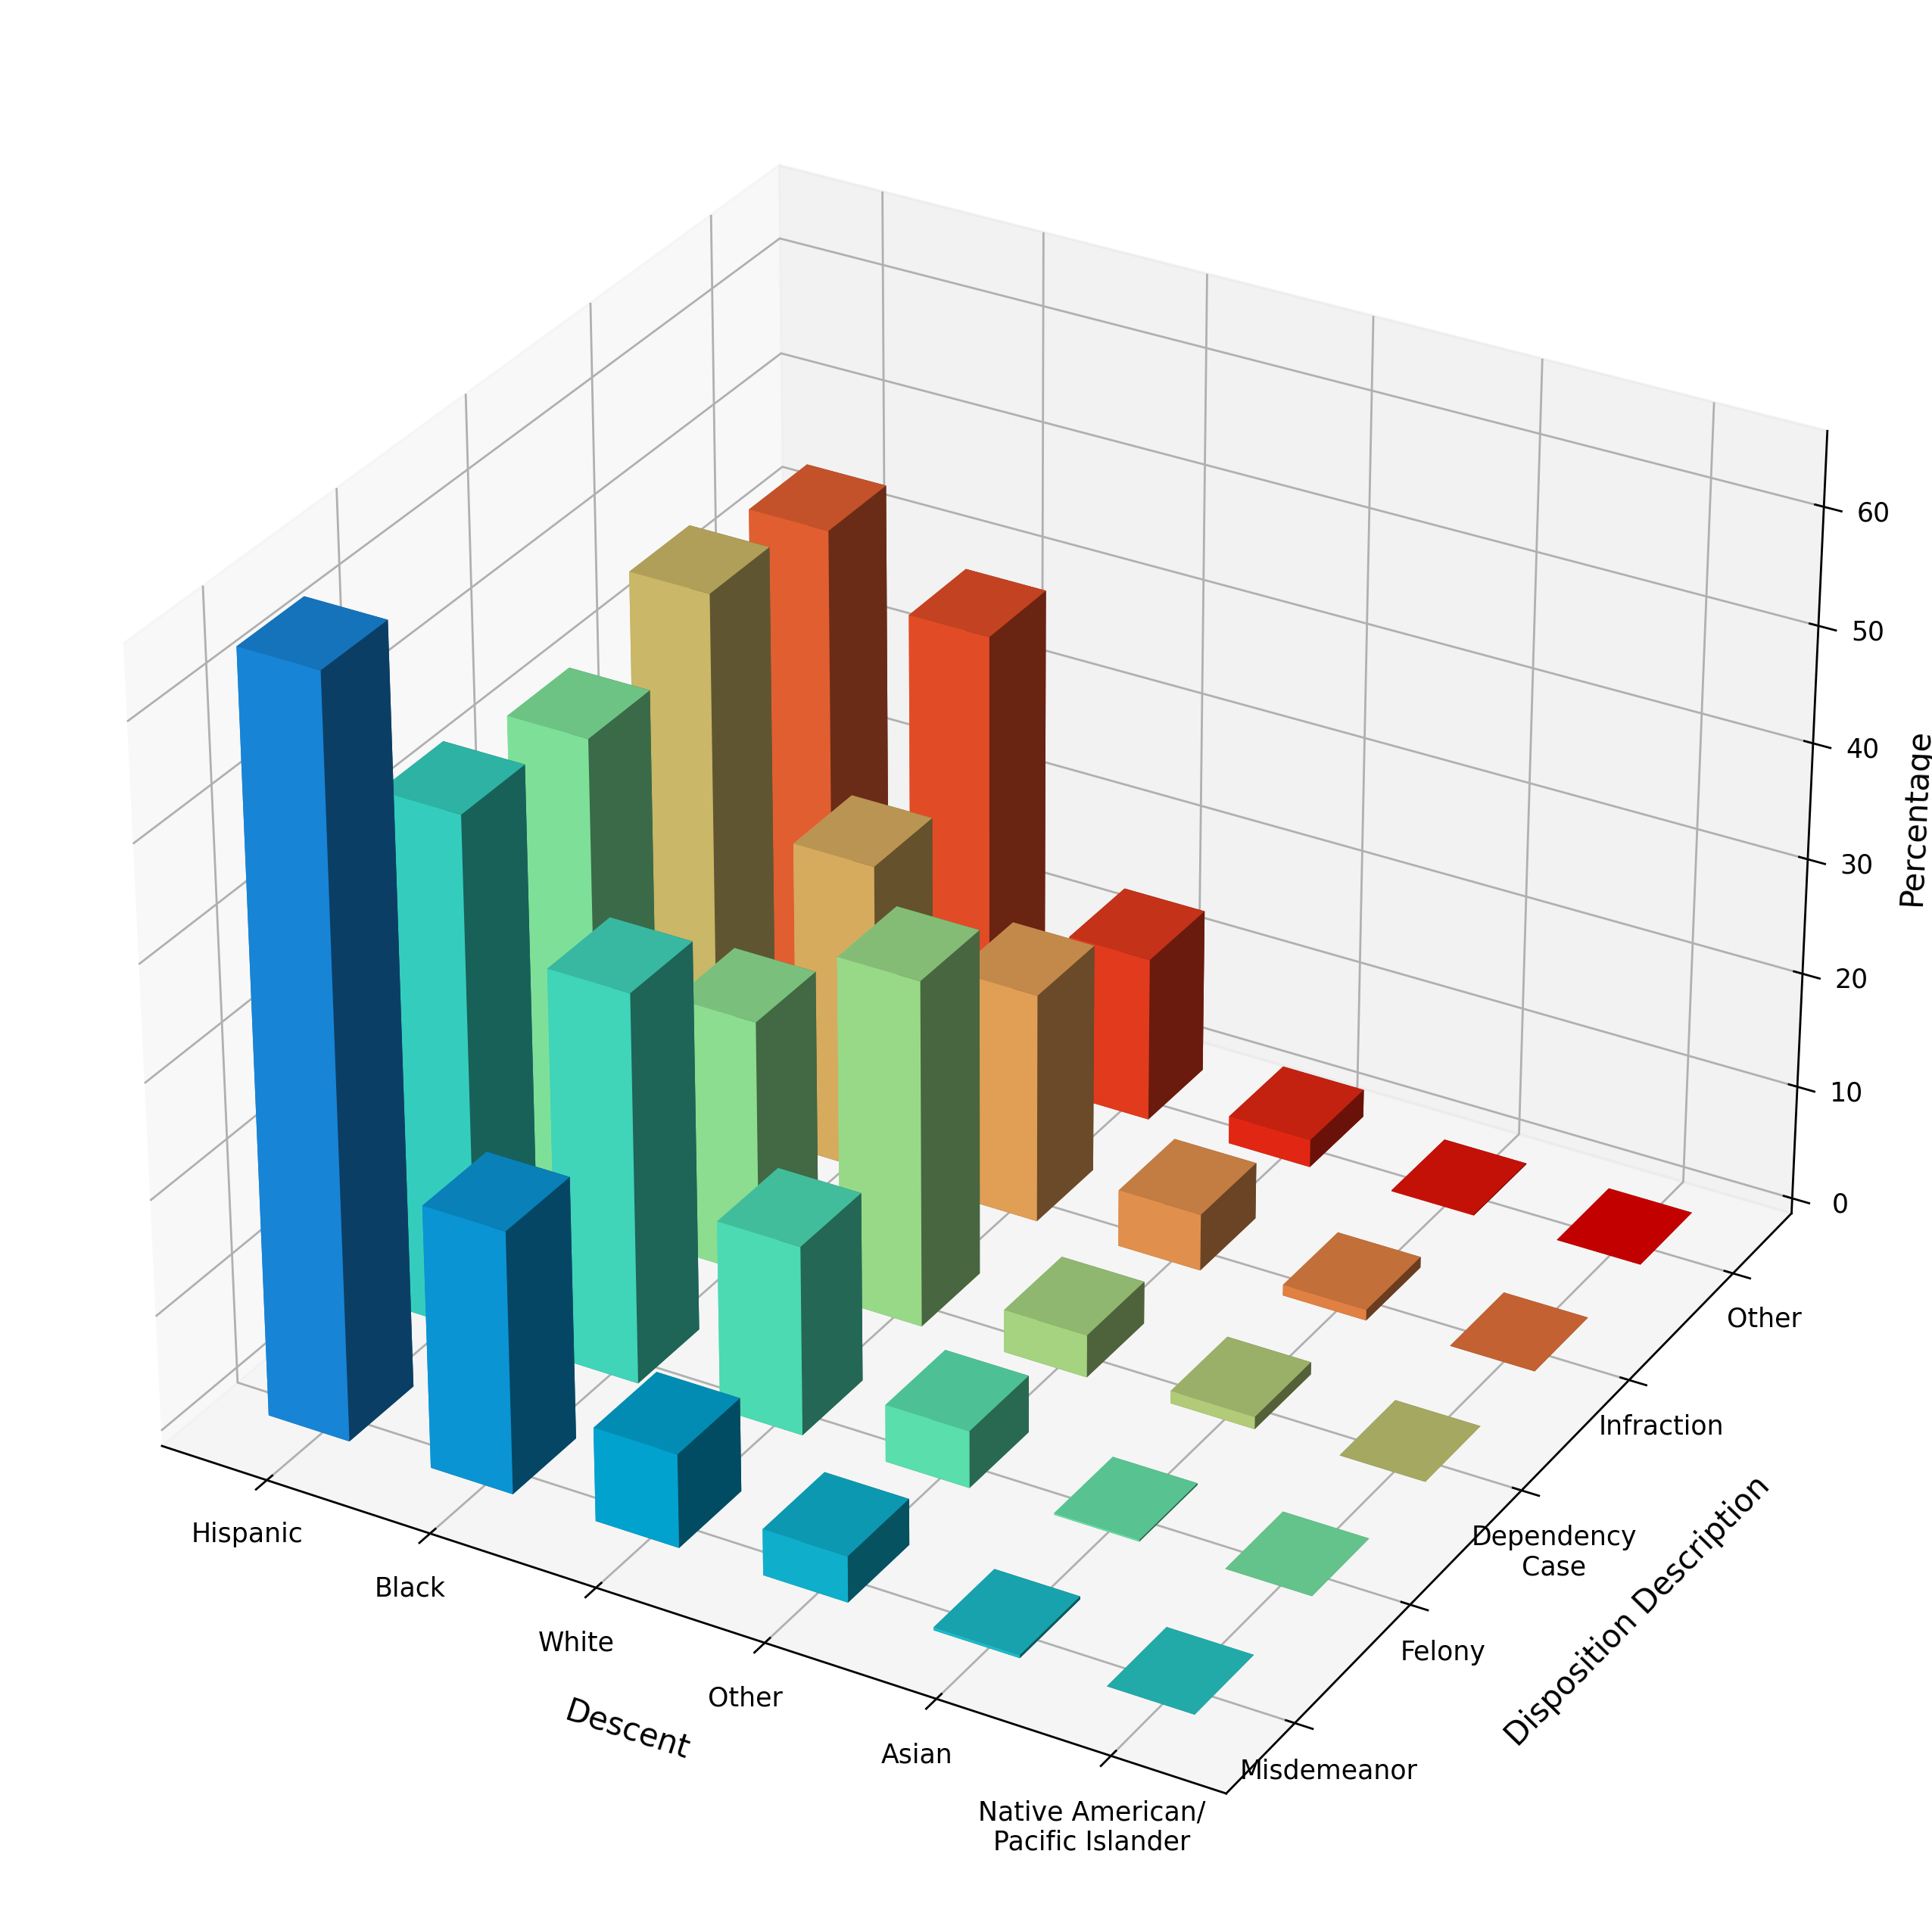

In [ ]:
#3D Bar Chart

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#result = two_way_table_array

#result=[['50.805', '24.845', '17.757', '5.765', '.857','.028'],
#        ['50.34', '31.74', '12.99', '4.75', '.15','.038'],
#        ['59.47', '28.73', '5.35', '6.01', '.45','0'],
#        ['59.5', '13.52', '22.09','3.86', '1.02','.0076'],
#        ['60.48', '24.02', '12.23', '3.27', '0','0']]


result = np.array(result, dtype=np.float)
colors = ['r','b','g','y','b','p']
fig=plt.figure(figsize=(13, 13), dpi=250)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Descent', labelpad=10)
ax1.set_ylabel('Disposition Description', labelpad=20)
ax1.set_zlabel('Percentage')
xlabels = np.array(['Hispanic', 'Black', 'White','Other', 'Asian', 'Native American/\nPacific Islander'])#hispanic, black, white, other, asian, native american/pacific islander
xpos = np.arange(xlabels.shape[0])
#ylabels = np.array(['Misdemeanor','Felony','District/City\nAttorney\nReject','Technical Arrest','Other']) - originally had but changed
ylabels = np.array(['Misdemeanor','Felony','Dependency\nCase','Infraction','Other'])

ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

#ax1.zaxis._axinfo['label']['space_factor'] = 6.0

ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)
ax1.zaxis.label.set_fontsize(12)

#plt.subplots_adjust(left=0.1)

values = np.linspace(0.2, 1, xposM.ravel().shape[0])#colors setting the shade for each
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)#setting position and color of each bar
plt.show()


Link to information and tutorials on importing data from files : https://datatofish.com/read_excel/


Importing .csv file into Google Colab video:
https://www.youtube.com/watch?v=oqMImCeXi6o